## Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
- Draw the inferences from the clusters obtained.

## Data Description:
- # The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers
- ID --Unique ID

- Balance--Number of miles eligible for award travel
- Qual_mile--Number of miles counted as qualifying for Topflight status
- cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
- cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
- cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:
    - 1 = under 5,000
    - 2 = 5,000 - 10,000
    - 3 = 10,001 - 25,000
    - 4 = 25,001 - 50,000
    - 5 = over 50,000
- Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months
- Bonus_trans--Number of non-flight bonus transactions in the past 12 months
- Flight_miles_12mo--Number of flight miles in the past 12 months
- Flight_trans_12--Number of flight transactions in the past 12 months
- Days_since_enrolled--Number of days since enrolled in flier program
- Award--whether that person had award flight (free flight) or not

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
#Top few records of the dataset
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
#Top few records of the dataset
df.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [5]:
#No of columns(features/variables) and rows(records)
df.shape

(3999, 12)

In [6]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
#data types
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

# Duplicates

In [8]:
df[df.duplicated()].shape

(0, 12)

In [9]:
df[df.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


# Drop columns

In [10]:
data_cleaned1=df.drop('ID#',axis=1)

In [11]:
data_cleaned1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [12]:
data_cleaned1.rename({'Award?':'Award','Flight_miles_12mo':'Flight_miles','Flight_trans_12':'Flight_trans'},inplace=True,axis=1)

In [13]:
data_cleaned1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles,Flight_trans,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


# Outlier Detection

<AxesSubplot:xlabel='Balance', ylabel='Count'>

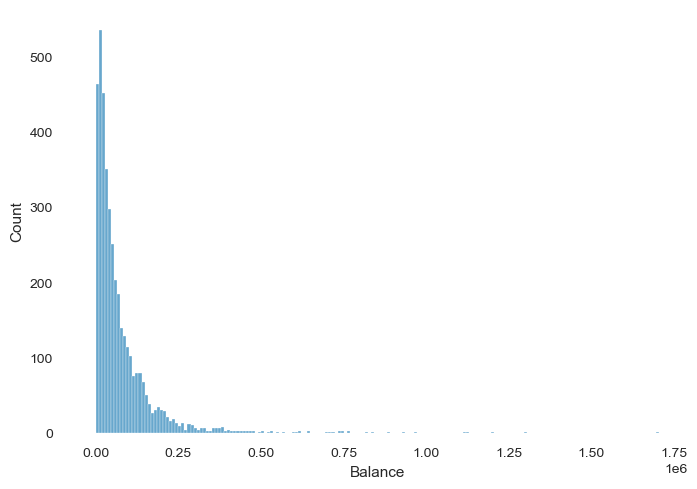

In [14]:
import seaborn as sns
sns.histplot(data_cleaned1.iloc[:,0])

<AxesSubplot:xlabel='Qual_miles', ylabel='Count'>

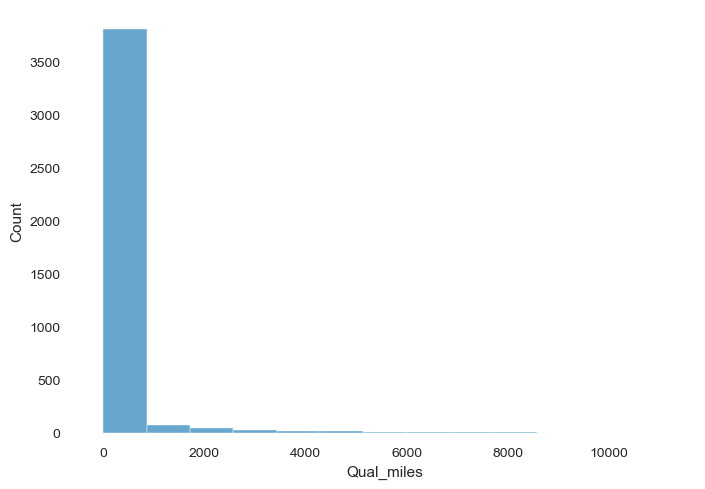

In [15]:
sns.histplot(data_cleaned1.iloc[:,1])

<AxesSubplot:xlabel='Bonus_miles', ylabel='Count'>

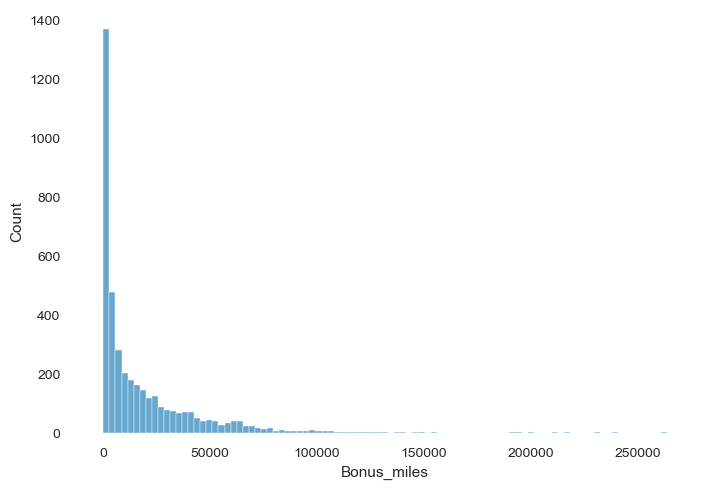

In [16]:
sns.histplot(data_cleaned1.iloc[:,5])

<AxesSubplot:xlabel='Bonus_trans', ylabel='Count'>

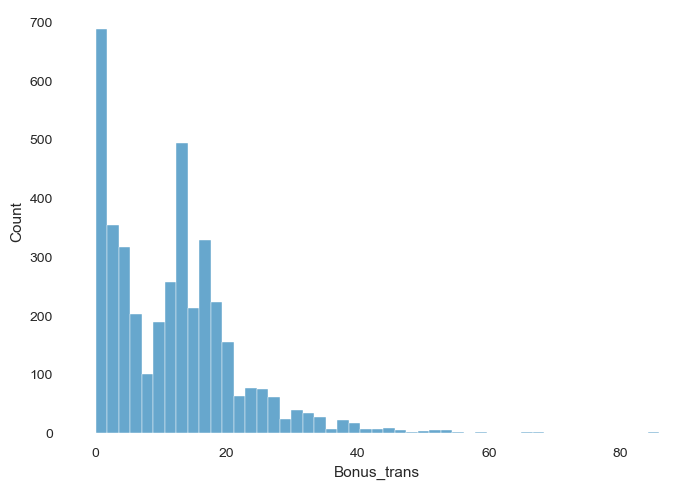

In [17]:
sns.histplot(data_cleaned1.iloc[:,6])

<AxesSubplot:xlabel='Days_since_enroll', ylabel='Count'>

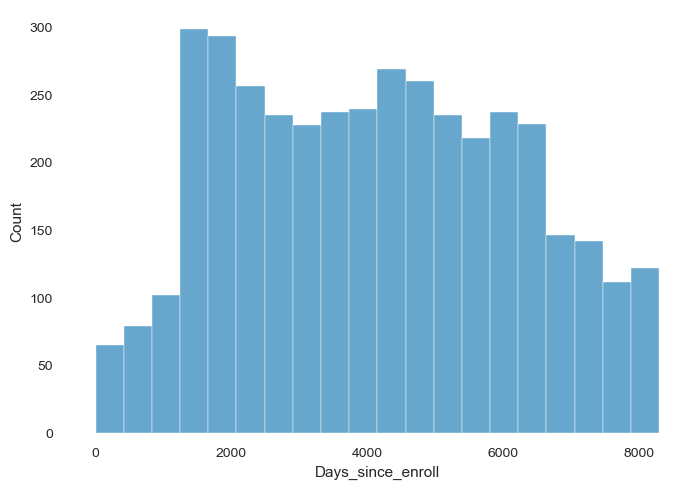

In [18]:
sns.histplot(data_cleaned1.iloc[:,9])

In [19]:
data_cleaned1.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles,Flight_trans,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


[Text(0, 0, '2289'),
 Text(0, 0, '288'),
 Text(0, 0, '525'),
 Text(0, 0, '613'),
 Text(0, 0, '284')]

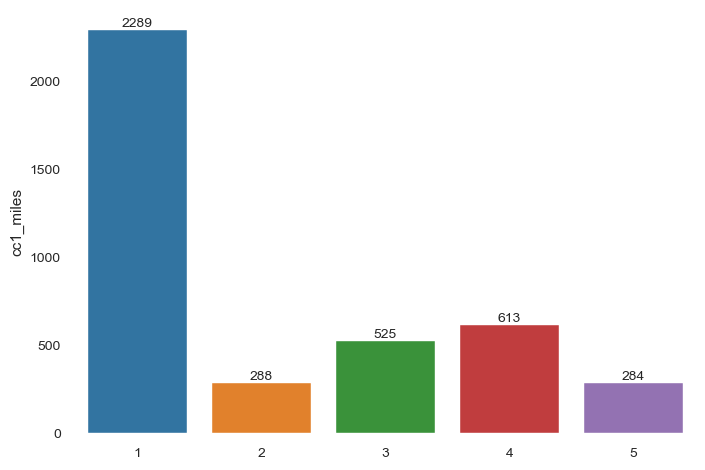

In [20]:
ax=sns.barplot(x=data_cleaned1.iloc[:,2].unique(),y=data_cleaned1.iloc[:,2].value_counts())
ax.bar_label(ax.containers[0])

[Text(0, 0, '3956'), Text(0, 0, '28'), Text(0, 0, '15')]

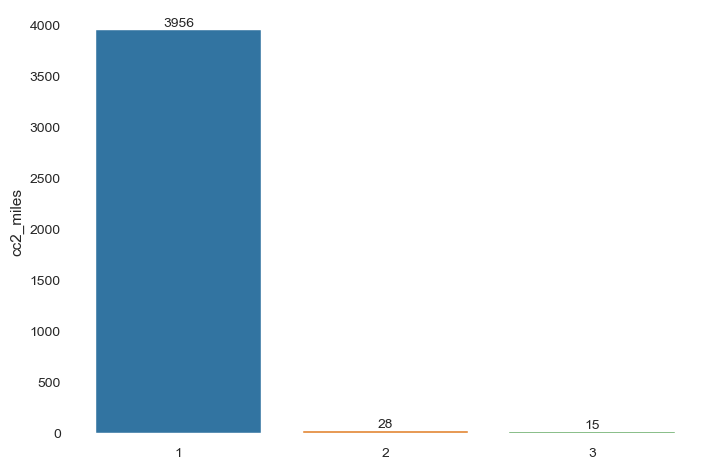

In [21]:
ax=sns.barplot(x=data_cleaned1.iloc[:,3].unique(),y=data_cleaned1.iloc[:,3].value_counts())
ax.bar_label(ax.containers[0])

[Text(0, 0, '3981'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '4'),
 Text(0, 0, '3')]

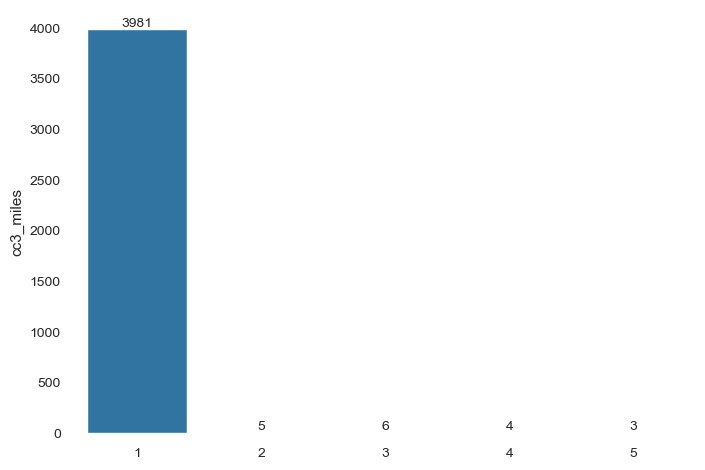

In [22]:
ax=sns.barplot(x=data_cleaned1.iloc[:,4].unique(),y=data_cleaned1.iloc[:,4].value_counts())
ax.bar_label(ax.containers[0])

# Missing Values and Imputation

<AxesSubplot:>

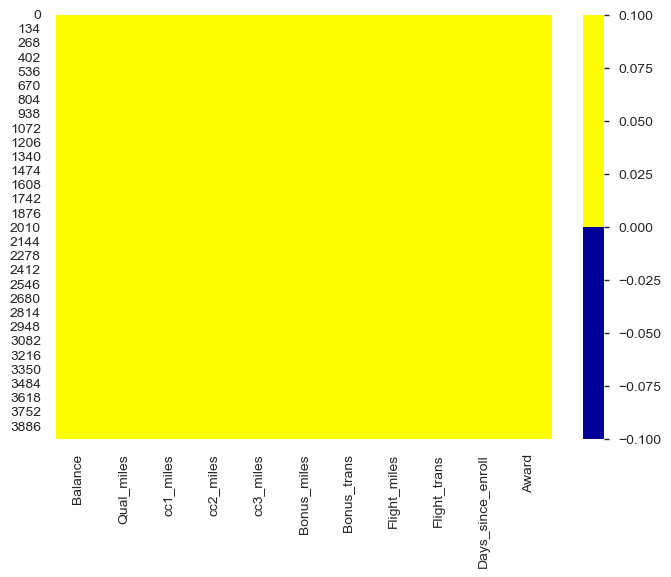

In [23]:
cols = data_cleaned1.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_cleaned1[cols].isnull(),
            cmap=sns.color_palette(colours))

# Normalization of the data

In [24]:
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions

In [25]:
array = data_cleaned1.values
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:12])
#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[1.65e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 6.60e-04 1.16e-02 0.00e+00
  0.00e+00 8.44e-01 0.00e+00]
 [1.13e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 8.15e-04 2.33e-02 0.00e+00
  0.00e+00 8.40e-01 0.00e+00]
 [2.43e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.56e-02 4.65e-02 0.00e+00
  0.00e+00 8.48e-01 0.00e+00]
 [8.67e-03 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.90e-03 1.16e-02 0.00e+00
  0.00e+00 8.38e-01 0.00e+00]
 [5.73e-02 0.00e+00 7.50e-01 0.00e+00 0.00e+00 1.64e-01 3.02e-01 6.74e-02
  7.55e-02 8.36e-01 1.00e+00]]


In [26]:
scaleddf=pd.DataFrame(data=rescaledX,columns=data_cleaned1.columns)
scaleddf

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles,Flight_trans,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# K-Means

# Selecting Hyper Parameter = K-Value using Elbow Plot

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# From above elbow plot we set K-value as 5

In [28]:
clusters_new = KMeans(5, random_state=30)
clusters_new.fit(scaleddf)

KMeans(n_clusters=5, random_state=30)

In [29]:
clusters_new.labels_

array([4, 4, 4, ..., 1, 0, 0])

In [30]:
data_cleaned2=data_cleaned1.iloc[:]
data_cleaned2['clusterid_new'] = clusters_new.labels_

In [31]:
data_cleaned2.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles,Flight_trans,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
1,1,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
2,2,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
3,3,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0
4,4,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0


In [32]:
# Split-out validation dataset
array = data_cleaned2.values
# separate array into input and output components
X = array[:,0:11]
Y = array[:,-1]

[Text(0, 0, '618'),
 Text(0, 0, '868'),
 Text(0, 0, '673'),
 Text(0, 0, '808'),
 Text(0, 0, '1032')]

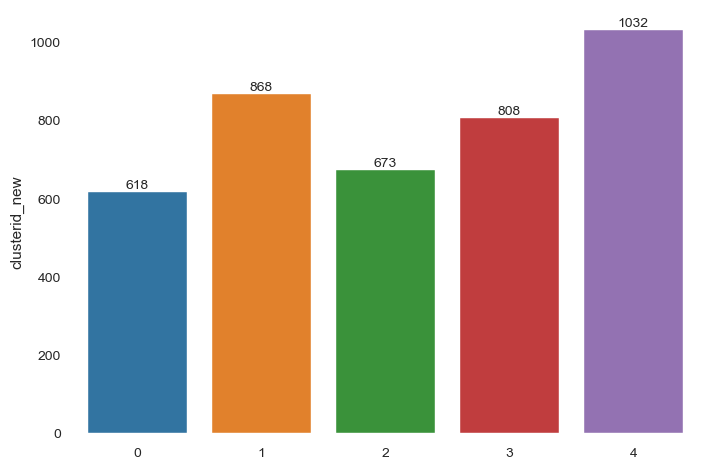

In [33]:
ax=sns.barplot(x=data_cleaned2.iloc[:,-1].unique(),y=data_cleaned2.iloc[:,-1].value_counts())
ax.bar_label(ax.containers[0])

# DBSCAN

In [34]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [35]:
data_standarized=StandardScaler().fit_transform(data_cleaned1)
data_standarized=pd.DataFrame(data_standarized,columns=data_cleaned1.columns)
data_standarized

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles,Flight_trans,Days_since_enroll,Award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


# estimating DBSCAN’s two parameters:
- Minimum samples (“MinPts”): the fewest number of points required to form a cluster
- ε (epsilon or “eps”): the maximum distance two points can be from one another while still belonging to the same cluster

- As a rule of thumb, MinPts= 2·D can be used, but it may be necessary to choose larger values for very large data, for noisy data, or for data that contains many duplicates.
- After you select your MinPts value, you can move on to determining ε.
- The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

In [36]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=13)
nbrs = neigh.fit(data_standarized)
distances, indices = nbrs.kneighbors(data_standarized)

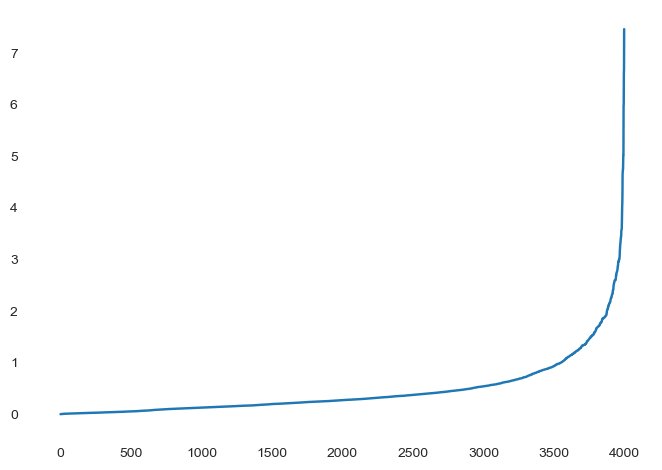

In [37]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [38]:
dbscan = DBSCAN(eps=1.5, min_samples=13)
dbscan.fit(data_standarized)

DBSCAN(eps=1.5, min_samples=13)

In [39]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [40]:
data_cleaned3=data_cleaned1.iloc[:]
data_cleaned3['clusterid_new'] = dbscan.labels_

In [41]:
data_cleaned3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles,Flight_trans,Days_since_enroll,Award,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [42]:
data_cleaned3.groupby('clusterid_new').agg(['mean','count']).reset_index()

clusterid_new        Balance         Qual_miles       cc1_miles        \
                          mean count         mean count      mean count   
0            -1  203562.547739   398  1236.731156   398  2.653266   398   
1             0   55480.033991  2383    11.492237  2383  1.682333  2383   
2             1   67233.665272  1195    27.898745  1195  2.633473  1195   
3             2   38575.642857    14     0.000000    14  1.000000    14   
4             3   24511.666667     9  2596.666667     9  1.111111     9   

  cc2_miles       cc3_miles  ... Bonus_trans       Flight_miles        \
       mean count      mean  ...        mean count         mean count   
0  1.110553   398  1.123116  ...   23.188442   398  2572.703518   398   
1  1.000000  2383  1.000000  ...    8.699119  2383   168.335292  2383   
2  1.000000  1195  1.000000  ...   13.564017  1195   346.220921  1195   
3  2.000000    14  1.000000  ...   12.928571    14    46.428571    14   
4  1.000000     9  1.000000  ...    5.222222     9    33.333333     9   

  Flight_trans       Days_since_enroll           Award        
          mean count              mean count      mean count  
0     7.537688   398       4700.907035   398  0.718593   398  
1     0.493076  2383       3809.891313  2383  0.000000  2383  
2     1.097908  1195       4559.925523  1195  1.000000  1195  
3     0.285714    14       3594.642857    14  0.000000    14  
4     0.222222     9       2305.666667     9  0.000000     9  

[5 rows x 23 columns]

In [43]:
# Split-out validation dataset
array = data_cleaned3.values
# separate array into input and output components
X = array[:,0:11]
Y = array[:,-1]

[Text(0, 0, '398'),
 Text(0, 0, '2383'),
 Text(0, 0, '1195'),
 Text(0, 0, '14'),
 Text(0, 0, '9')]

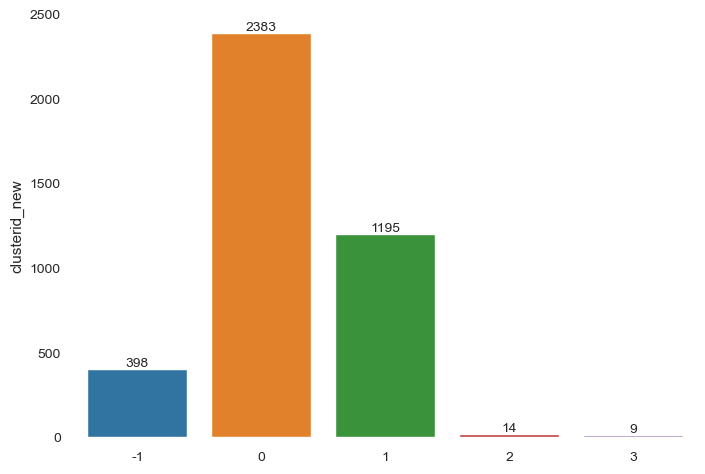

In [44]:
ax=sns.barplot(x=data_cleaned3.iloc[:,-1].unique(),y=data_cleaned3.iloc[:,-1].value_counts())
ax.bar_label(ax.containers[0])

# Hierarchical Clustering

In [45]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

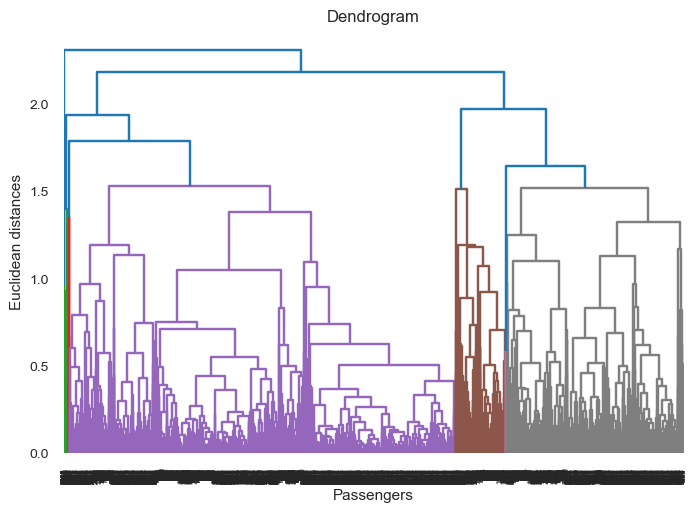

In [46]:
dendrogram = sch.dendrogram(sch.linkage(scaleddf, 'complete'))
plt.title('Dendrogram')
plt.xlabel('Passengers')
plt.ylabel('Euclidean distances')
plt.show()

In [47]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
model

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [48]:
y=pd.DataFrame(model.fit_predict(scaleddf),columns=['clusterid_new'])
y['clusterid_new'].value_counts()

0    2495
2    1144
1     325
4      31
3       4
Name: clusterid_new, dtype: int64

In [49]:
data_cleaned4=pd.concat([data_cleaned1,y],axis=1)
data_cleaned4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles,Flight_trans,Days_since_enroll,Award,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [50]:
# Split-out validation dataset
array = data_cleaned4.values
# separate array into input and output components
X = array[:,0:11]
Y = array[:,-1]

[Text(0, 0, '2495'),
 Text(0, 0, '1144'),
 Text(0, 0, '325'),
 Text(0, 0, '4'),
 Text(0, 0, '31')]

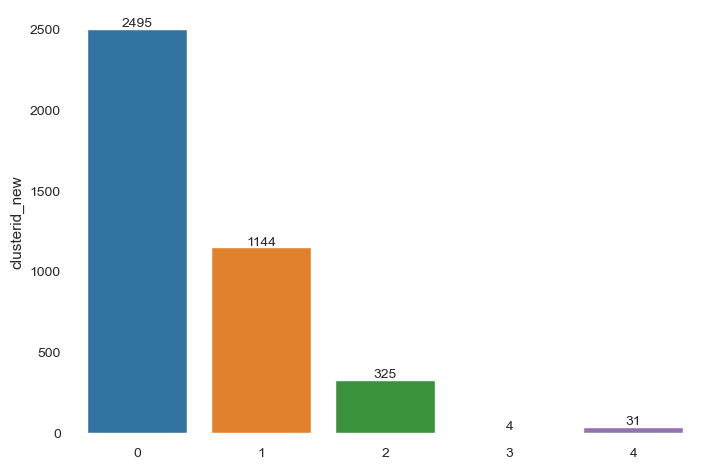

In [51]:
ax=sns.barplot(x=data_cleaned4.iloc[:,-1].unique(),y=data_cleaned4.iloc[:,-1].value_counts())
ax.bar_label(ax.containers[0])

In [52]:
data_cleaned4.groupby('clusterid_new').agg(['mean','count']).reset_index()

clusterid_new        Balance        Qual_miles       cc1_miles        \
                          mean count        mean count      mean count   
0             0   59968.433667  2495   88.883768  2495  1.712224  2495   
1             1  157084.578462   325  208.673846   325  4.661538   325   
2             2   80173.963287  1144  248.550699  1144  2.104895  1144   
3             3  131999.500000     4  347.000000     4  2.500000     4   
4             4   45515.064516    31   32.258065    31  1.000000    31   

  cc2_miles       cc3_miles  ... Bonus_trans        Flight_miles        \
       mean count      mean  ...        mean count          mean count   
0  1.000401  2495  1.011222  ...    9.105812  2495    227.797194  2495   
1  1.000000   325  1.061538  ...   23.249231   325   1019.433846   325   
2  1.009615  1144  1.000874  ...   13.412587  1144    739.958916  1144   
3  1.000000     4  1.000000  ...   69.250000     4  19960.000000     4   
4  2.483871    31  1.000000  ...   16.129032    31    443.225806    31   

  Flight_trans       Days_since_enroll           Award        
          mean count              mean count      mean count  
0     0.656112  2495       3825.392786  2495  0.000802  2495  
1     3.196923   325       5770.572308   325  1.000000   325  
2     2.236888  1144       4304.383741  1144  1.000000  1144  
3    49.250000     4       2200.250000     4  1.000000     4  
4     1.967742    31       3784.258065    31  0.193548    31  

[5 rows x 23 columns]